In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

In [38]:
# decision tree

# Get data (with this very useful NumPy reader):
data = np.genfromtxt('AlephBtag_MC_small_v2.csv', names=True)

# Kinematics (energy and direction) of the jet:
energy = data['energy']
cTheta = data['cTheta']
phi    = data['phi']

# Classification variables (those used in Aleph's NN):
prob_b = data['prob_b']
spheri = data['spheri']
pt2rel = data['pt2rel']
multip = data['multip']
bqvjet = data['bqvjet']
ptlrel = data['ptlrel']

# Aleph's NN score:
nnbjet = data['nnbjet']

# Truth variable whether it really was a b-jet or not (i.e. target)
isb    = data['isb']

# X = np.vstack((prob_b, spheri, pt2rel, ptlrel, multip, bqvjet))
# df = pd.read_csv('AlephBtag_MC_small_v2.csv')

# df.corr()

In [39]:
# split data set

X = np.vstack((energy, cTheta, phi, prob_b, spheri, pt2rel, ptlrel, multip, bqvjet, nnbjet)).T

y = isb

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [40]:
# decision tree


model = clf = DecisionTreeClassifier()

model = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f'Basic decision tree accuracy is: {accuracy}')


Basic decision tree accuracy is: 0.8550191345304681


Exact explainer: 6795it [02:28, 43.20it/s]                          


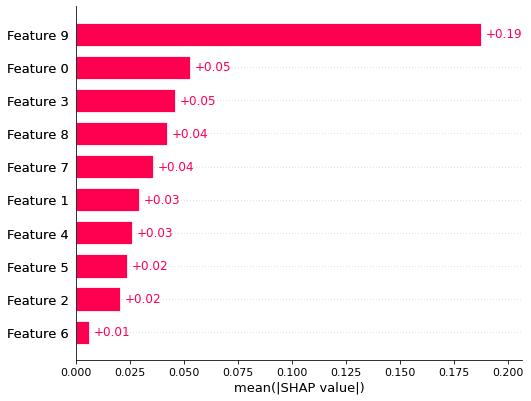

In [41]:
import shap

explainer = shap.Explainer(model.predict, X_test)
# shap_values = explainer(X_train)
shap_values = explainer(X_test)
# print(shap_values)
shap.plots.bar(shap_values)